In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import setup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [2]:
from processamento_dados import load_data, rename_columns

In [3]:
DATAFRAME_PATH = os.path.join('..','data', 'teste_indicium_precificacao.csv')
df = load_data(DATAFRAME_PATH)

In [4]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
df.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [6]:
standard_language_columns = {
    "nome": "name",
    "bairro_group": "neighborhood_group",
    "bairro": "neighborhood",
    "minimo_noites": "minimum_nights",
    "numero_de_reviews": "number_of_reviews",
    "ultima_review": "last_review",
    "reviews_por_mes": "reviews_per_month",
    "calculado_host_listings_count": "calculated_host_listings_count",
    "disponibilidade_365": "availability_365",
}
df = rename_columns(df, standard_language_columns)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48894 non-null  int64  
 1   name                            48878 non-null  object 
 2   host_id                         48894 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighborhood_group              48894 non-null  object 
 5   neighborhood                    48894 non-null  object 
 6   latitude                        48894 non-null  float64
 7   longitude                       48894 non-null  float64
 8   room_type                       48894 non-null  object 
 9   price                           48894 non-null  int64  
 10  minimum_nights                  48894 non-null  int64  
 11  number_of_reviews               48894 non-null  int64  
 12  last_review                     

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighborhood_group                    0
neighborhood                          0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df_reviews_zero = df[df['number_of_reviews'] == 0]
df_reviews_zero.head()

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [11]:
price_0 = df[df['price'] == 0]
price_0.head()

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [12]:
df_reviews_zero.shape

(10052, 16)

In [13]:
statistics_group = df.groupby('neighborhood_group')['price'].describe()
statistics_group

,count,mean,std,min,25%,50%,75%,max
neighborhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20103.0,124.381983,186.878105,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


### Correlação entre minimo de noites disponibilizadas e preço

In [14]:
corr = df['price'].corr(df['minimum_nights'])

print(f'Correlação entre preço e número mínimo de noites: {corr:.2f}')
print("Não há uma correlação linear forte")

Correlação entre preço e número mínimo de noites: 0.04
Não há uma correlação linear forte


In [15]:
corr = df['price'].corr(df['availability_365'])

print(f'Correlação entre preço e Disponibilidade: {corr:.2f}')
print("Não há uma correlação linear forte")

Correlação entre preço e Disponibilidade: 0.08
Não há uma correlação linear forte


### Quantidade de imóveis disponíveis por bairro

In [16]:
df['neighborhood_group'].value_counts()

neighborhood_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

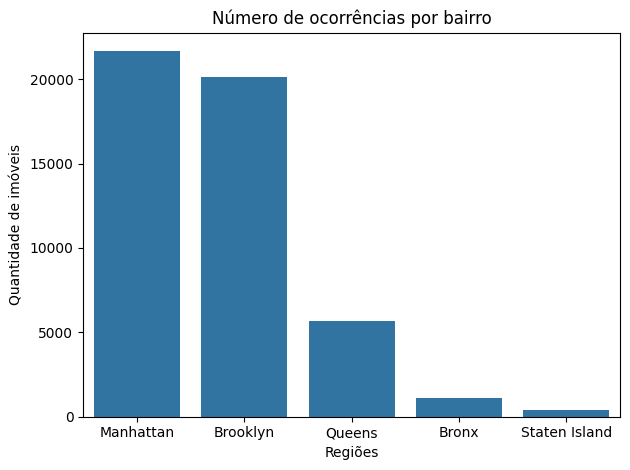

In [17]:
neighborhood_group_bar = df['neighborhood_group'].value_counts().reset_index()
neighborhood_group_bar.columns = ['neighborhood', 'quantity']
plt.ylabel("Quantidade de imóveis")
plt.xlabel("Regiões")
plt.title("Número de ocorrências por bairro")
sns.barplot(data=neighborhood_group_bar, x='neighborhood', y='quantity', orient='v')
plt.tight_layout()
plt.show()

In [18]:
def expensive_prices_common_words_20(expensive_prices):
    names = expensive_prices ['name'].tolist()
    word_counts =  Counter(" ".join(names).lower().split())
    return word_counts.most_common(20)
    


In [19]:
expensive_prices = df.nlargest(1000, 'price')[['name', 'price']]
words = expensive_prices_common_words_20(expensive_prices)
for w in words:
    print(w, end="\n")
    


('in', 212)
('bedroom', 121)
('luxury', 118)
('loft', 97)
('2', 92)
('the', 73)
('with', 71)
('-', 69)
('3', 69)
('apartment', 68)
('townhouse', 68)
('suite', 68)
('private', 65)
('apt', 61)
('of', 60)
('manhattan', 59)
('nyc', 59)
('village', 58)
('&', 55)
('park', 54)


In [20]:
no_zero_df = df[df['price'] > 0]
mean_price = no_zero_df.groupby('neighborhood')['price'].mean()
mean_price.columns = ['neighborhood', 'mean']
more_expensive_10 = mean_price.nlargest(10)
less_expensive_10 = mean_price.nsmallest(10)
expensive_values = df[df['neighborhood'].isin(more_expensive_10.index)]
cheap_values = df[df['neighborhood'].isin(less_expensive_10.index)]

/tmp/ipykernel_11968/3337248728.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_11968/3337248728.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)


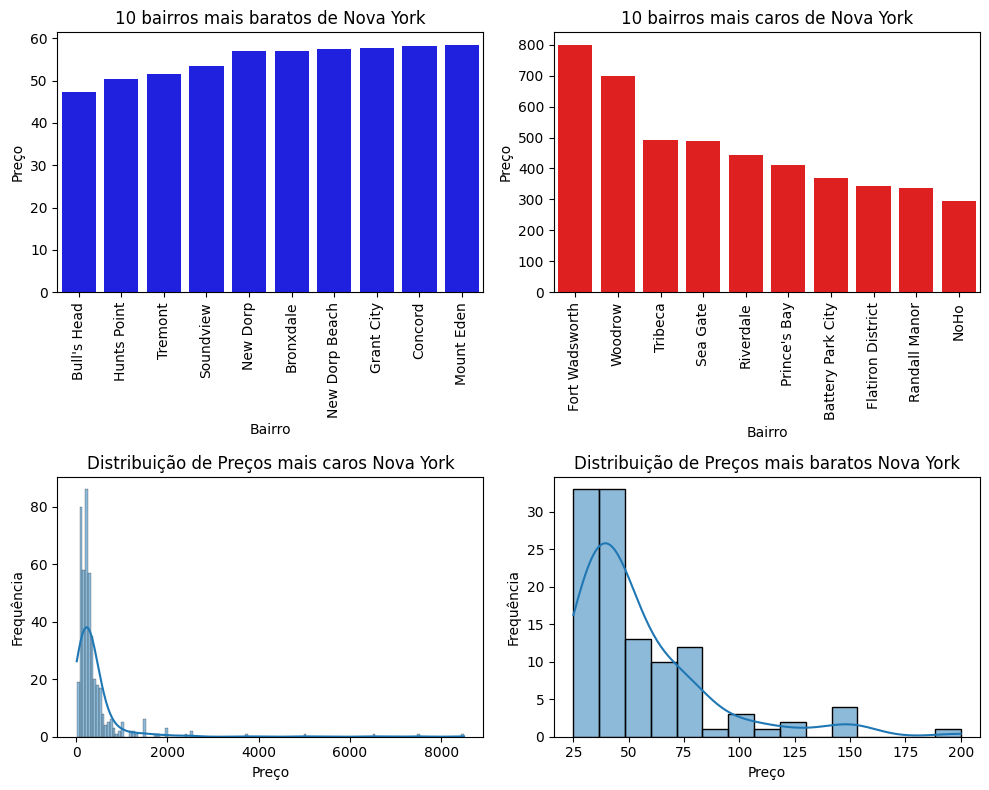

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(data=less_expensive_10, orient='v', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("10 bairros mais baratos de Nova York")
axes[0, 0].set_xlabel("Bairro")
axes[0, 0].set_ylabel("Preço")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.barplot(data=more_expensive_10, orient='v', ax=axes[0, 1], color='red')
axes[0, 1].set_title("10 bairros mais caros de Nova York")
axes[0, 1].set_xlabel("Bairro")
axes[0, 1].set_ylabel("Preço")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

sns.histplot(data=expensive_values, x='price', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Preços mais caros Nova York')
axes[1, 0].set_xlabel('Preço')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(data=cheap_values, x='price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Preços mais baratos Nova York')
axes[1, 1].set_xlabel('Preço')
axes[1, 1].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

baratos

## Analisando os bairros

In [22]:

manhattan = no_zero_df[no_zero_df['neighborhood_group'] == 'Manhattan']
brooklyn =  no_zero_df[no_zero_df['neighborhood_group'] == 'Brooklyn']
queens = no_zero_df[no_zero_df['neighborhood_group'] == 'Queens']
bronx = no_zero_df[no_zero_df['neighborhood_group'] == 'Bronx']
staten_island = no_zero_df[no_zero_df['neighborhood_group'] == 'Staten Island']


### Manhattan

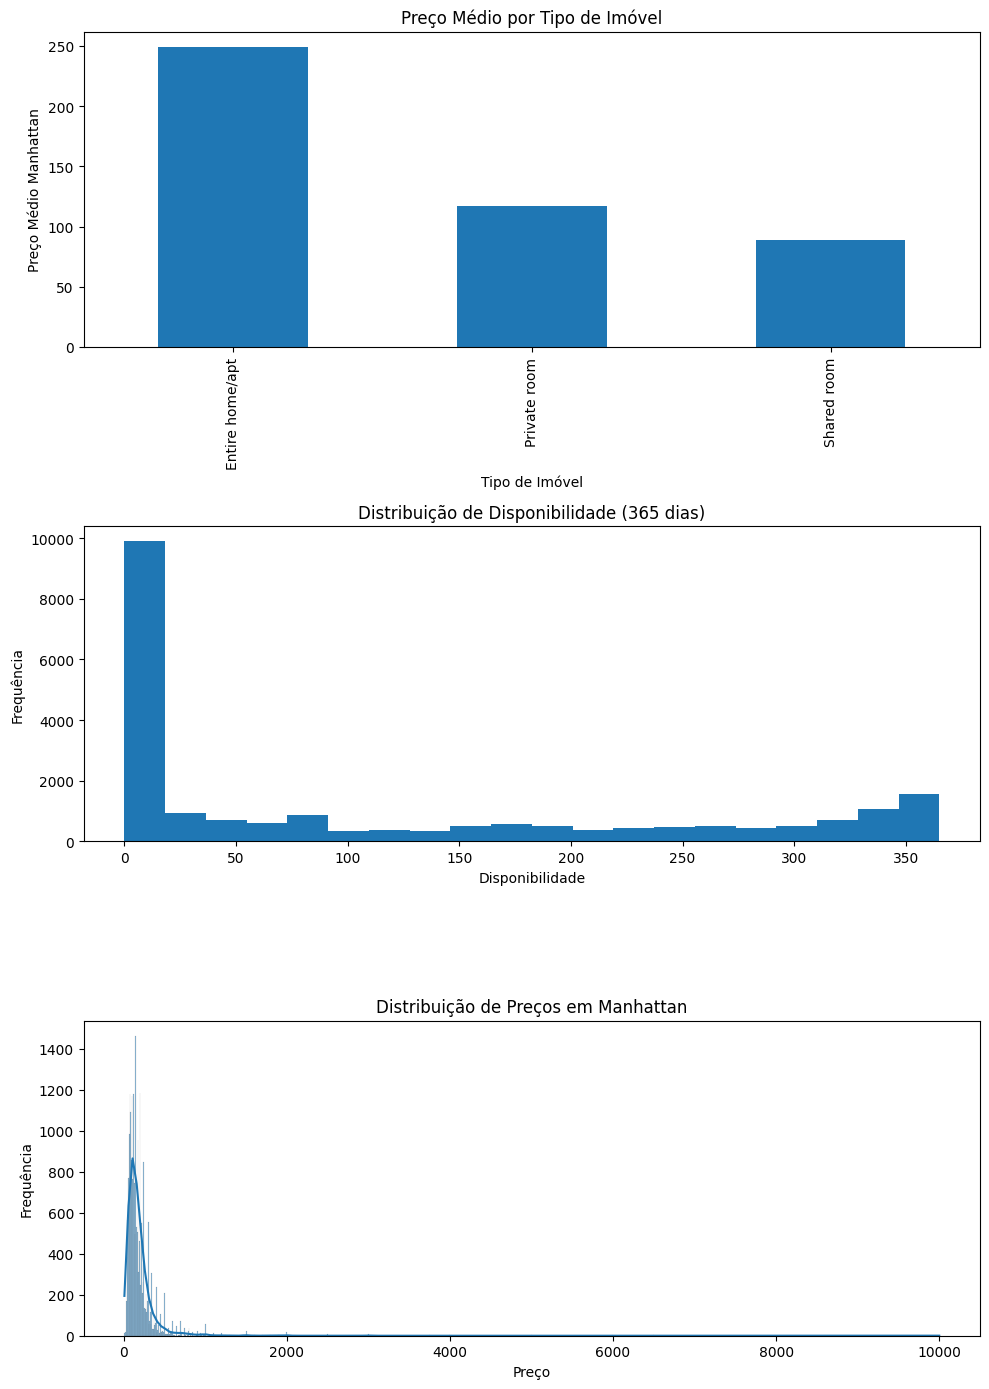

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

manhattan.groupby('room_type')['price'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Preço Médio por Tipo de Imóvel")
axes[0].set_xlabel("Tipo de Imóvel")
axes[0].set_ylabel("Preço Médio Manhattan")

manhattan['availability_365'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_title("Distribuição de Disponibilidade (365 dias)")
axes[1].set_xlabel("Disponibilidade")
axes[1].set_ylabel("Frequência")

sns.histplot(data=manhattan, x='price', kde=True)
axes[2].set_title('Distribuição de Preços em Manhattan')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

In [24]:
mean_price = manhattan.groupby('neighborhood')['price'].mean()
mean_price.columns = ['neighborhood', 'mean']
more_expensive_10 = mean_price.nlargest(10)
less_expensive_10 = mean_price.nsmallest(10)
expensive_values = manhattan[manhattan['neighborhood'].isin(more_expensive_10.index)]
cheap_values = manhattan[manhattan['neighborhood'].isin(less_expensive_10.index)]

/tmp/ipykernel_11968/2545342357.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_11968/2545342357.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)


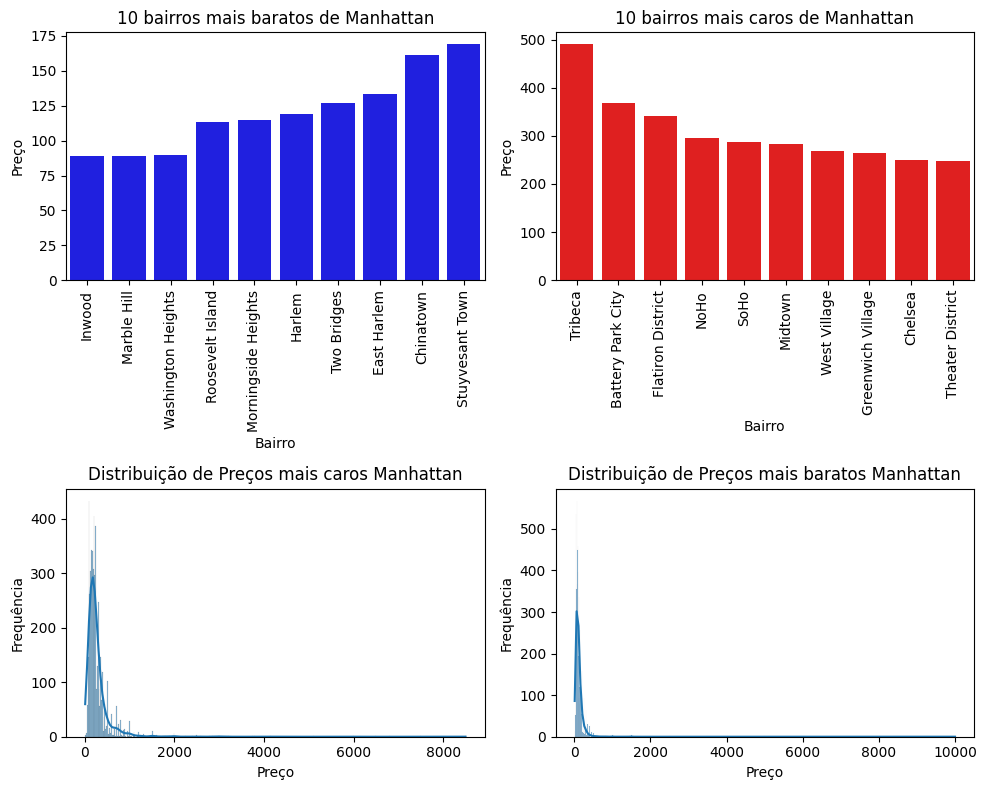

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(data=less_expensive_10, orient='v', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("10 bairros mais baratos de Manhattan")
axes[0, 0].set_xlabel("Bairro")
axes[0, 0].set_ylabel("Preço")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.barplot(data=more_expensive_10, orient='v', ax=axes[0, 1], color='red')
axes[0, 1].set_title("10 bairros mais caros de Manhattan")
axes[0, 1].set_xlabel("Bairro")
axes[0, 1].set_ylabel("Preço")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

sns.histplot(data=expensive_values, x='price', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Preços mais caros Manhattan')
axes[1, 0].set_xlabel('Preço')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(data=cheap_values, x='price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Preços mais baratos Manhattan')
axes[1, 1].set_xlabel('Preço')
axes[1, 1].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

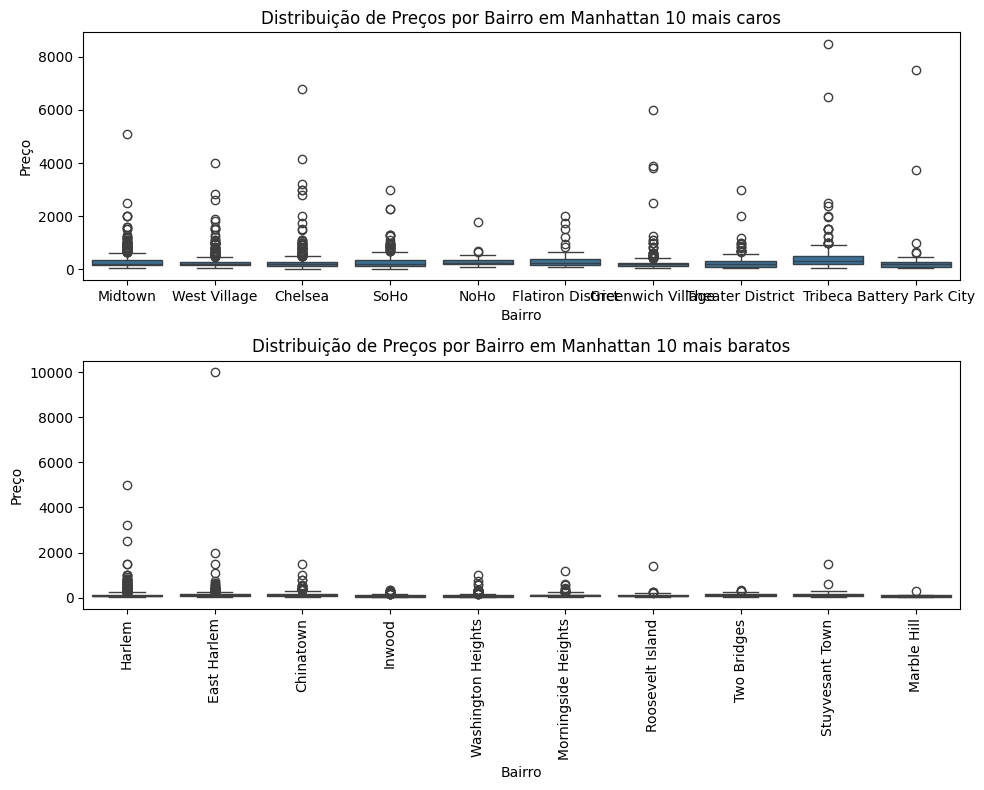

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(x='neighborhood', y='price', data=expensive_values, ax=axes[0])
axes[0].set_title('Distribuição de Preços por Bairro em Manhattan 10 mais caros')
axes[0].set_xlabel('Bairro')
axes[0].set_ylabel('Preço')
plt.xticks(rotation=90)

sns.boxplot(x='neighborhood', y='price', data=cheap_values, ax=axes[1])
axes[1].set_title('Distribuição de Preços por Bairro em Manhattan 10 mais baratos')
axes[1].set_xlabel('Bairro')
axes[1].set_ylabel('Preço')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

### Brooklyn

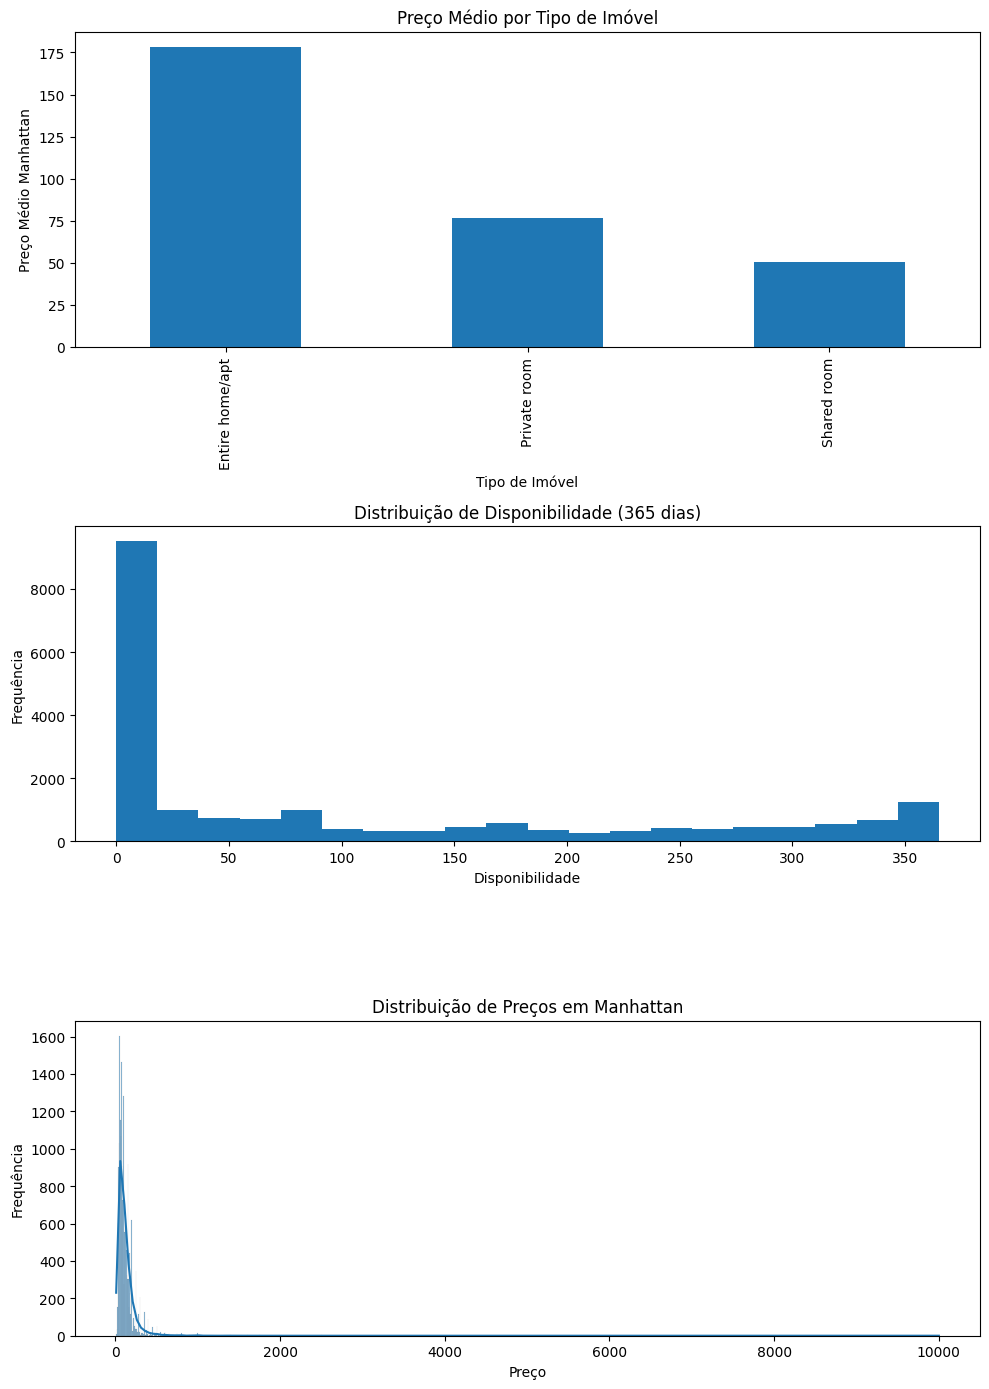

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

brooklyn.groupby('room_type')['price'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Preço Médio por Tipo de Imóvel")
axes[0].set_xlabel("Tipo de Imóvel")
axes[0].set_ylabel("Preço Médio Manhattan")

brooklyn['availability_365'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_title("Distribuição de Disponibilidade (365 dias)")
axes[1].set_xlabel("Disponibilidade")
axes[1].set_ylabel("Frequência")

sns.histplot(data=brooklyn, x='price', kde=True)
axes[2].set_title('Distribuição de Preços em Manhattan')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('Frequência')


plt.tight_layout()
plt.show()


In [28]:
mean_price = brooklyn.groupby('neighborhood')['price'].mean()
mean_price.columns = ['neighborhood', 'mean']
more_expensive_10 = mean_price.nlargest(10)
less_expensive_10 = mean_price.nsmallest(10)
expensive_values = brooklyn[brooklyn['neighborhood'].isin(more_expensive_10.index)]
cheap_values = brooklyn[brooklyn['neighborhood'].isin(less_expensive_10.index)]

/tmp/ipykernel_11968/2988125793.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_11968/2988125793.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)


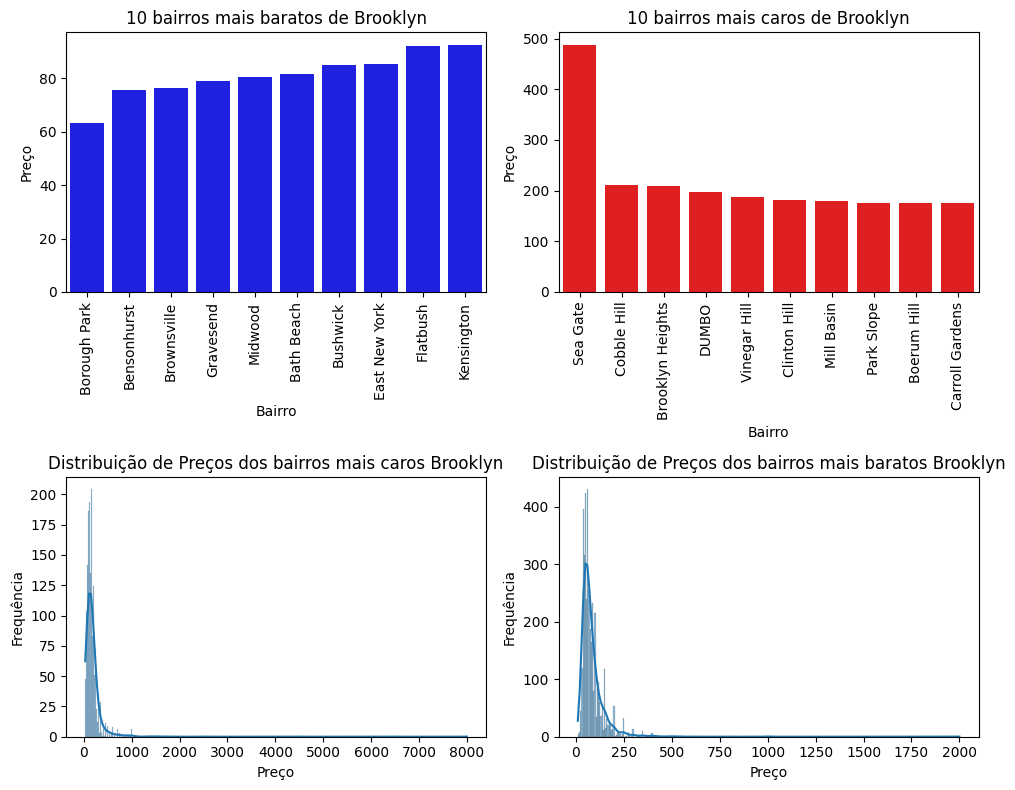

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(data=less_expensive_10, orient='v', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("10 bairros mais baratos de Brooklyn")
axes[0, 0].set_xlabel("Bairro")
axes[0, 0].set_ylabel("Preço")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.barplot(data=more_expensive_10, orient='v', ax=axes[0, 1], color='red')
axes[0, 1].set_title("10 bairros mais caros de Brooklyn")
axes[0, 1].set_xlabel("Bairro")
axes[0, 1].set_ylabel("Preço")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

sns.histplot(data=expensive_values, x='price', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Preços dos bairros mais caros Brooklyn')
axes[1, 0].set_xlabel('Preço')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(data=cheap_values, x='price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Preços dos bairros mais baratos Brooklyn')
axes[1, 1].set_xlabel('Preço')
axes[1, 1].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

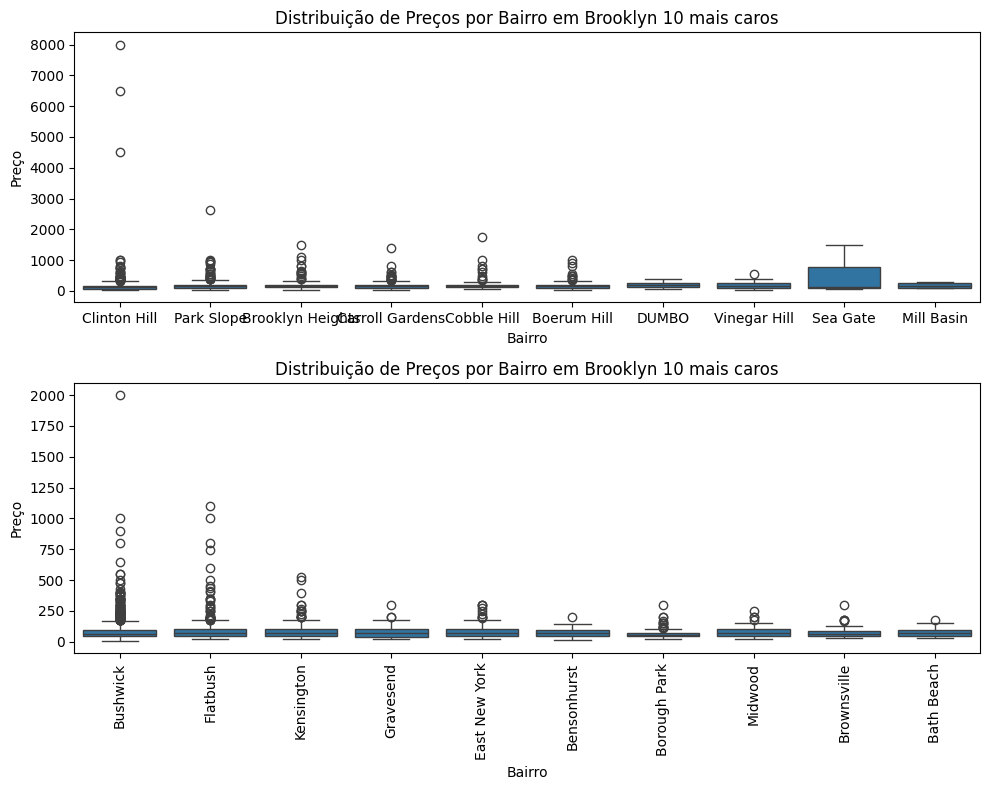

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(x='neighborhood', y='price', data=expensive_values, ax=axes[0])
axes[0].set_title('Distribuição de Preços por Bairro em Brooklyn 10 mais caros')
axes[0].set_xlabel('Bairro')
axes[0].set_ylabel('Preço')
plt.xticks(rotation=90)

sns.boxplot(x='neighborhood', y='price', data=cheap_values, ax=axes[1])
axes[1].set_title('Distribuição de Preços por Bairro em Brooklyn 10 mais caros')
axes[1].set_xlabel('Bairro')
axes[1].set_ylabel('Preço')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

### Queens

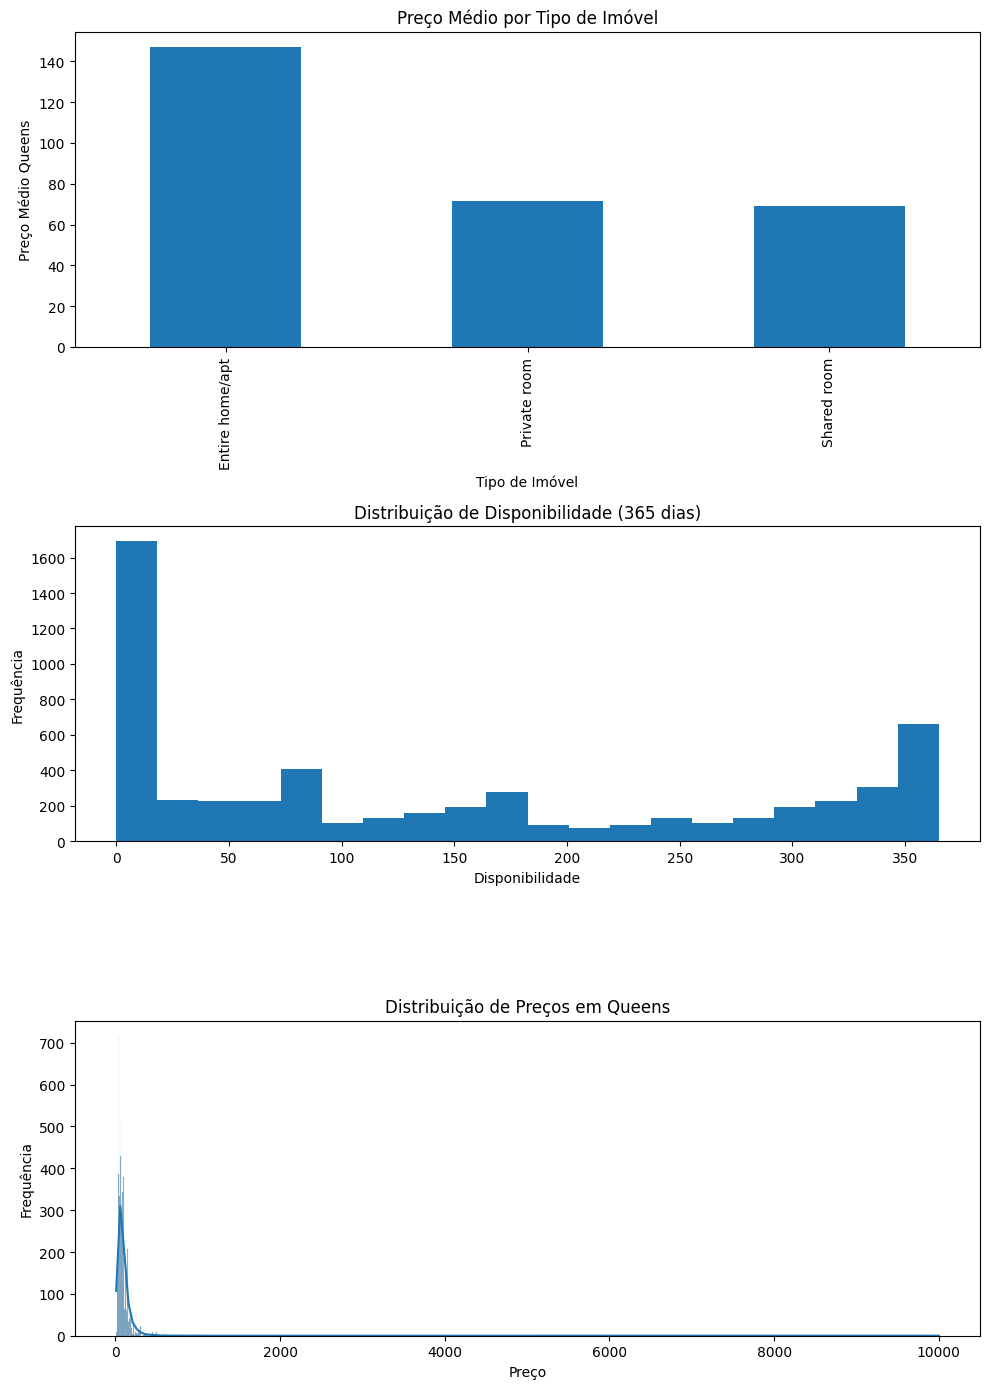

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

queens.groupby('room_type')['price'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Preço Médio por Tipo de Imóvel")
axes[0].set_xlabel("Tipo de Imóvel")
axes[0].set_ylabel("Preço Médio Queens")

queens['availability_365'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_title("Distribuição de Disponibilidade (365 dias)")
axes[1].set_xlabel("Disponibilidade")
axes[1].set_ylabel("Frequência")

sns.histplot(data=queens, x='price', kde=True)
axes[2].set_title('Distribuição de Preços em Queens')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

In [32]:
mean_price = queens.groupby('neighborhood')['price'].mean()
mean_price.columns = ['neighborhood', 'mean']
more_expensive_10 = mean_price.nlargest(10)
less_expensive_10 = mean_price.nsmallest(10)
expensive_values = queens[queens['neighborhood'].isin(more_expensive_10.index)]
cheap_values = queens[queens['neighborhood'].isin(less_expensive_10.index)]

/tmp/ipykernel_11968/783139937.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_11968/783139937.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)


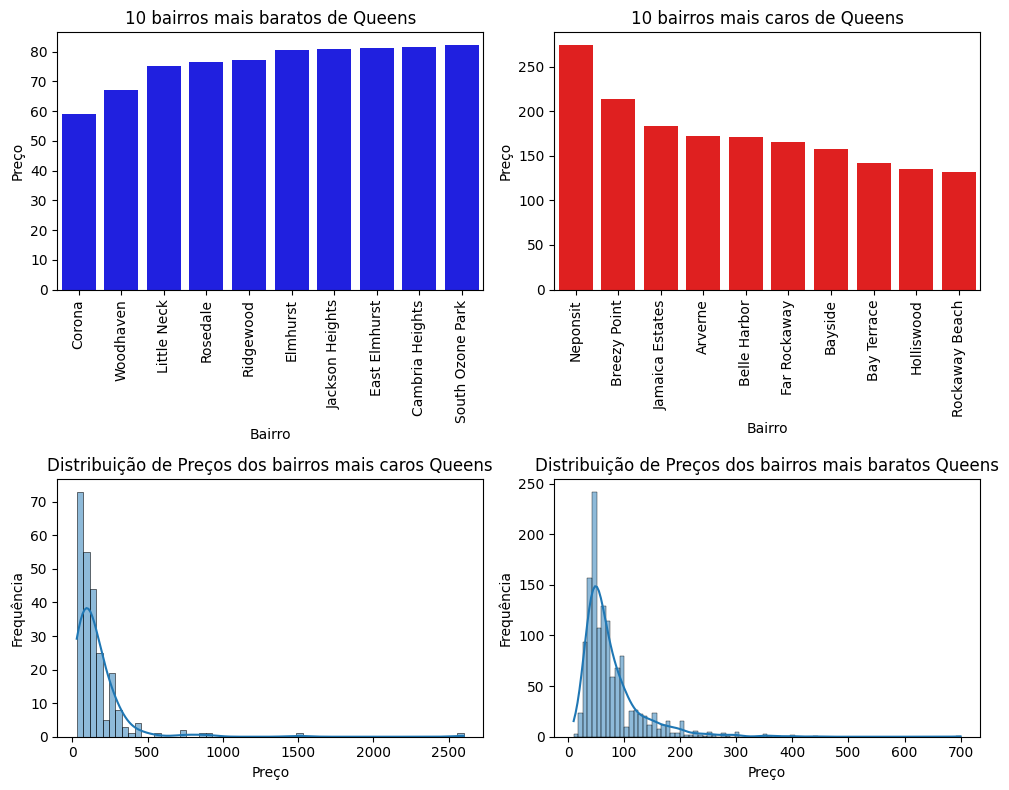

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(data=less_expensive_10, orient='v', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("10 bairros mais baratos de Queens")
axes[0, 0].set_xlabel("Bairro")
axes[0, 0].set_ylabel("Preço")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.barplot(data=more_expensive_10, orient='v', ax=axes[0, 1], color='red')
axes[0, 1].set_title("10 bairros mais caros de Queens")
axes[0, 1].set_xlabel("Bairro")
axes[0, 1].set_ylabel("Preço")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

sns.histplot(data=expensive_values, x='price', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Preços dos bairros mais caros Queens')
axes[1, 0].set_xlabel('Preço')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(data=cheap_values, x='price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Preços dos bairros mais baratos Queens')
axes[1, 1].set_xlabel('Preço')
axes[1, 1].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

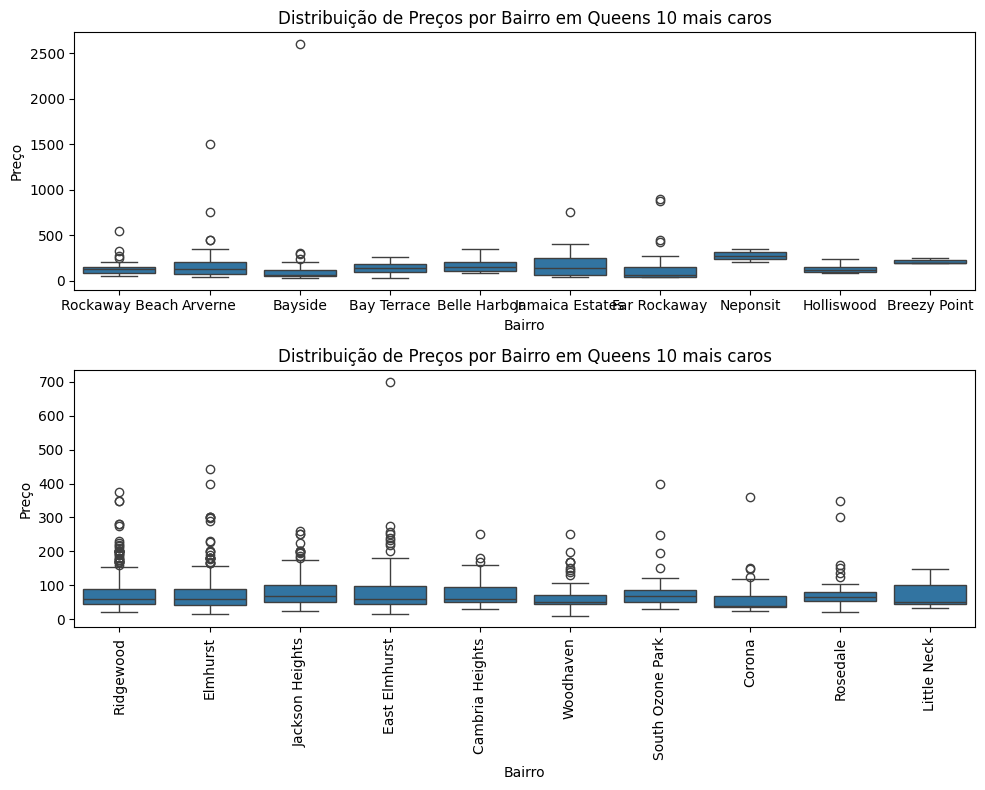

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(x='neighborhood', y='price', data=expensive_values, ax=axes[0])
axes[0].set_title('Distribuição de Preços por Bairro em Queens 10 mais caros')
axes[0].set_xlabel('Bairro')
axes[0].set_ylabel('Preço')
plt.xticks(rotation=90)

sns.boxplot(x='neighborhood', y='price', data=cheap_values, ax=axes[1])
axes[1].set_title('Distribuição de Preços por Bairro em Queens 10 mais caros')
axes[1].set_xlabel('Bairro')
axes[1].set_ylabel('Preço')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

### Bronx

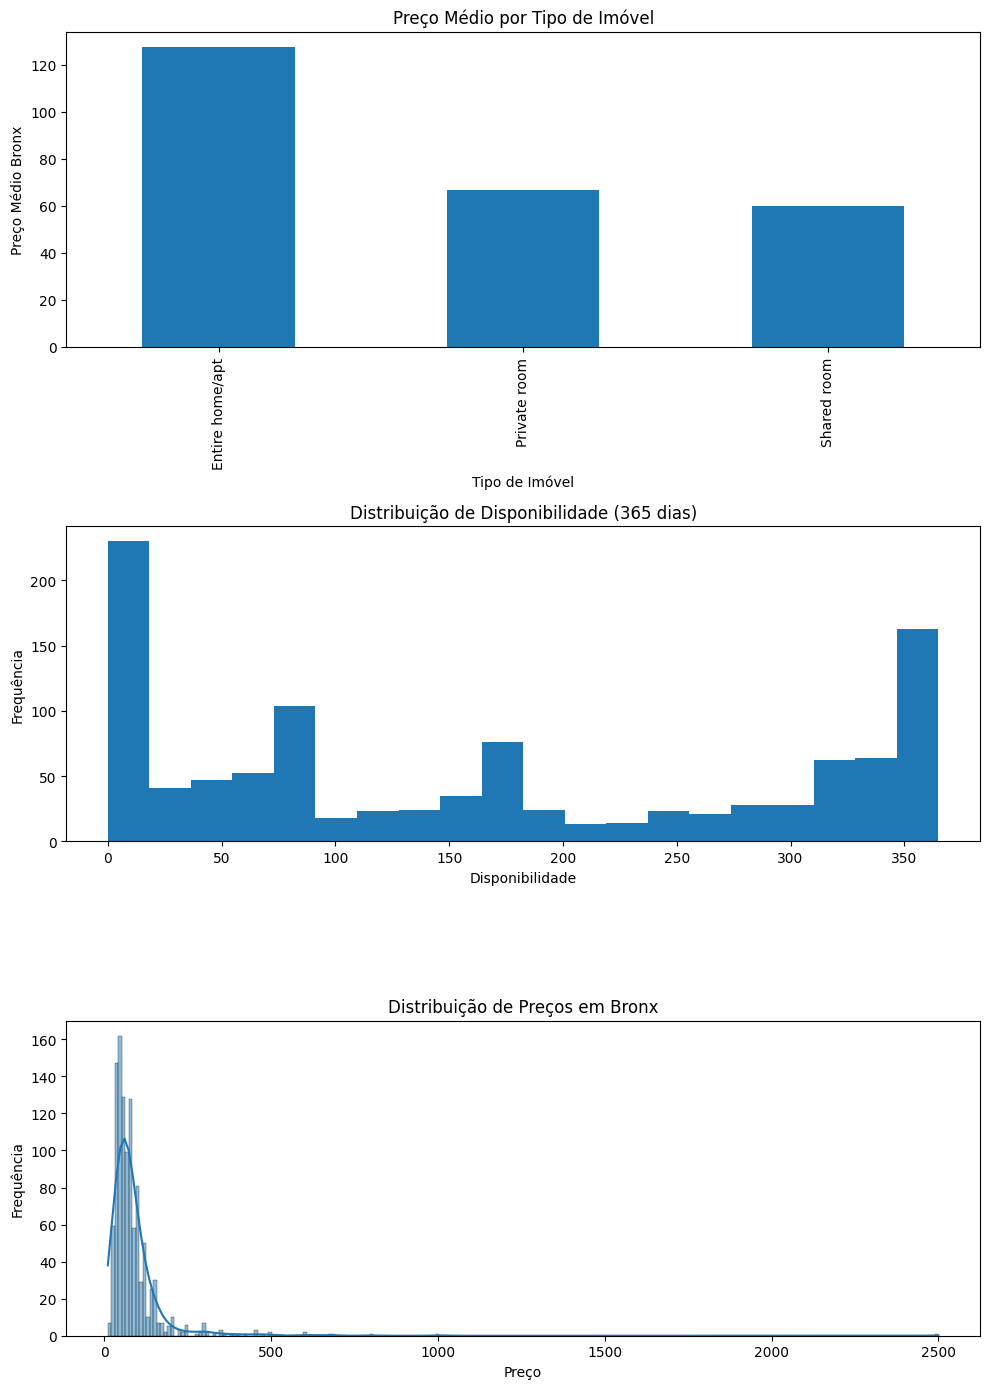

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

bronx.groupby('room_type')['price'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Preço Médio por Tipo de Imóvel")
axes[0].set_xlabel("Tipo de Imóvel")
axes[0].set_ylabel("Preço Médio Bronx")

bronx['availability_365'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_title("Distribuição de Disponibilidade (365 dias)")
axes[1].set_xlabel("Disponibilidade")
axes[1].set_ylabel("Frequência")

sns.histplot(data=bronx, x='price', kde=True)
axes[2].set_title('Distribuição de Preços em Bronx')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

In [36]:
mean_price = bronx.groupby('neighborhood')['price'].mean()
mean_price.columns = ['neighborhood', 'mean']
more_expensive_10 = mean_price.nlargest(10)
less_expensive_10 = mean_price.nsmallest(10)
expensive_values = bronx[bronx['neighborhood'].isin(more_expensive_10.index)]
cheap_values = bronx[bronx['neighborhood'].isin(less_expensive_10.index)]

/tmp/ipykernel_11968/1220369094.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_11968/1220369094.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)


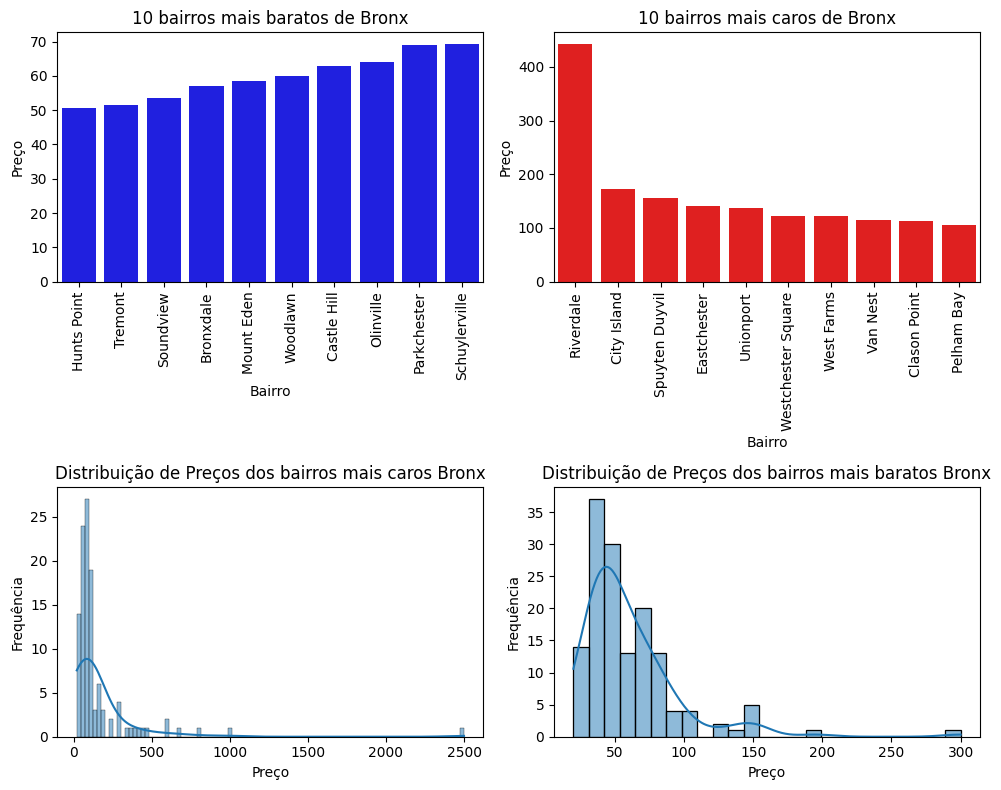

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(data=less_expensive_10, orient='v', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("10 bairros mais baratos de Bronx")
axes[0, 0].set_xlabel("Bairro")
axes[0, 0].set_ylabel("Preço")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.barplot(data=more_expensive_10, orient='v', ax=axes[0, 1], color='red')
axes[0, 1].set_title("10 bairros mais caros de Bronx")
axes[0, 1].set_xlabel("Bairro")
axes[0, 1].set_ylabel("Preço")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

sns.histplot(data=expensive_values, x='price', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Preços dos bairros mais caros Bronx')
axes[1, 0].set_xlabel('Preço')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(data=cheap_values, x='price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Preços dos bairros mais baratos Bronx')
axes[1, 1].set_xlabel('Preço')
axes[1, 1].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

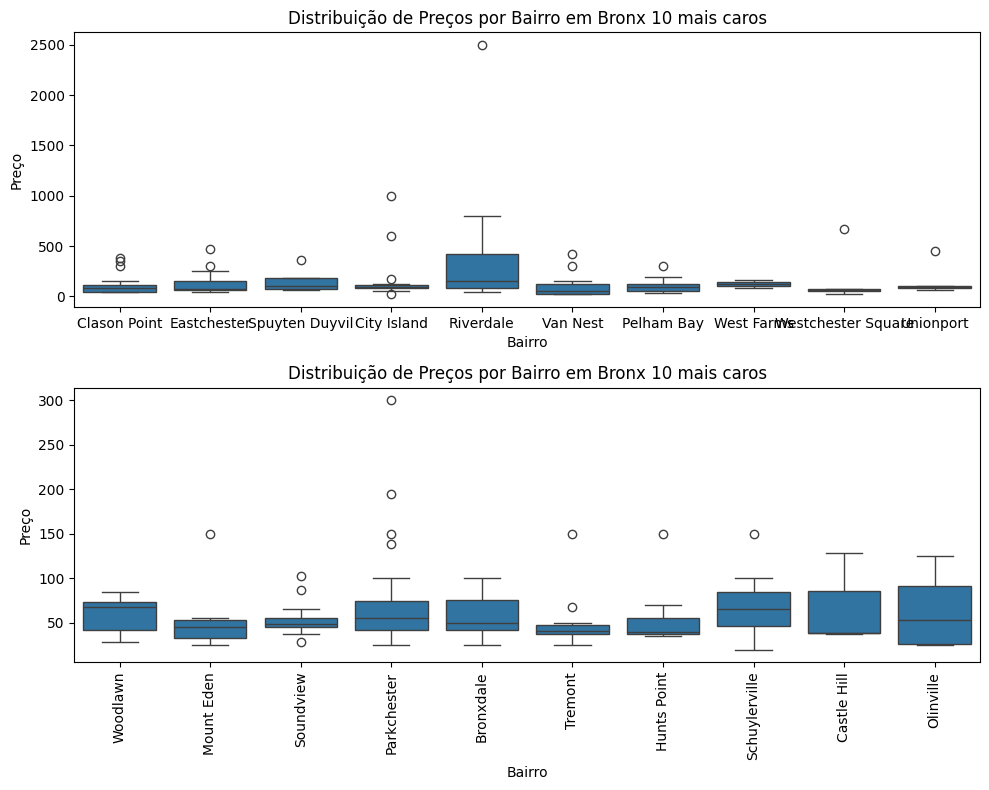

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(x='neighborhood', y='price', data=expensive_values, ax=axes[0])
axes[0].set_title('Distribuição de Preços por Bairro em Bronx 10 mais caros')
axes[0].set_xlabel('Bairro')
axes[0].set_ylabel('Preço')
plt.xticks(rotation=90)

sns.boxplot(x='neighborhood', y='price', data=cheap_values, ax=axes[1])
axes[1].set_title('Distribuição de Preços por Bairro em Bronx 10 mais caros')
axes[1].set_xlabel('Bairro')
axes[1].set_ylabel('Preço')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

### Staten Island

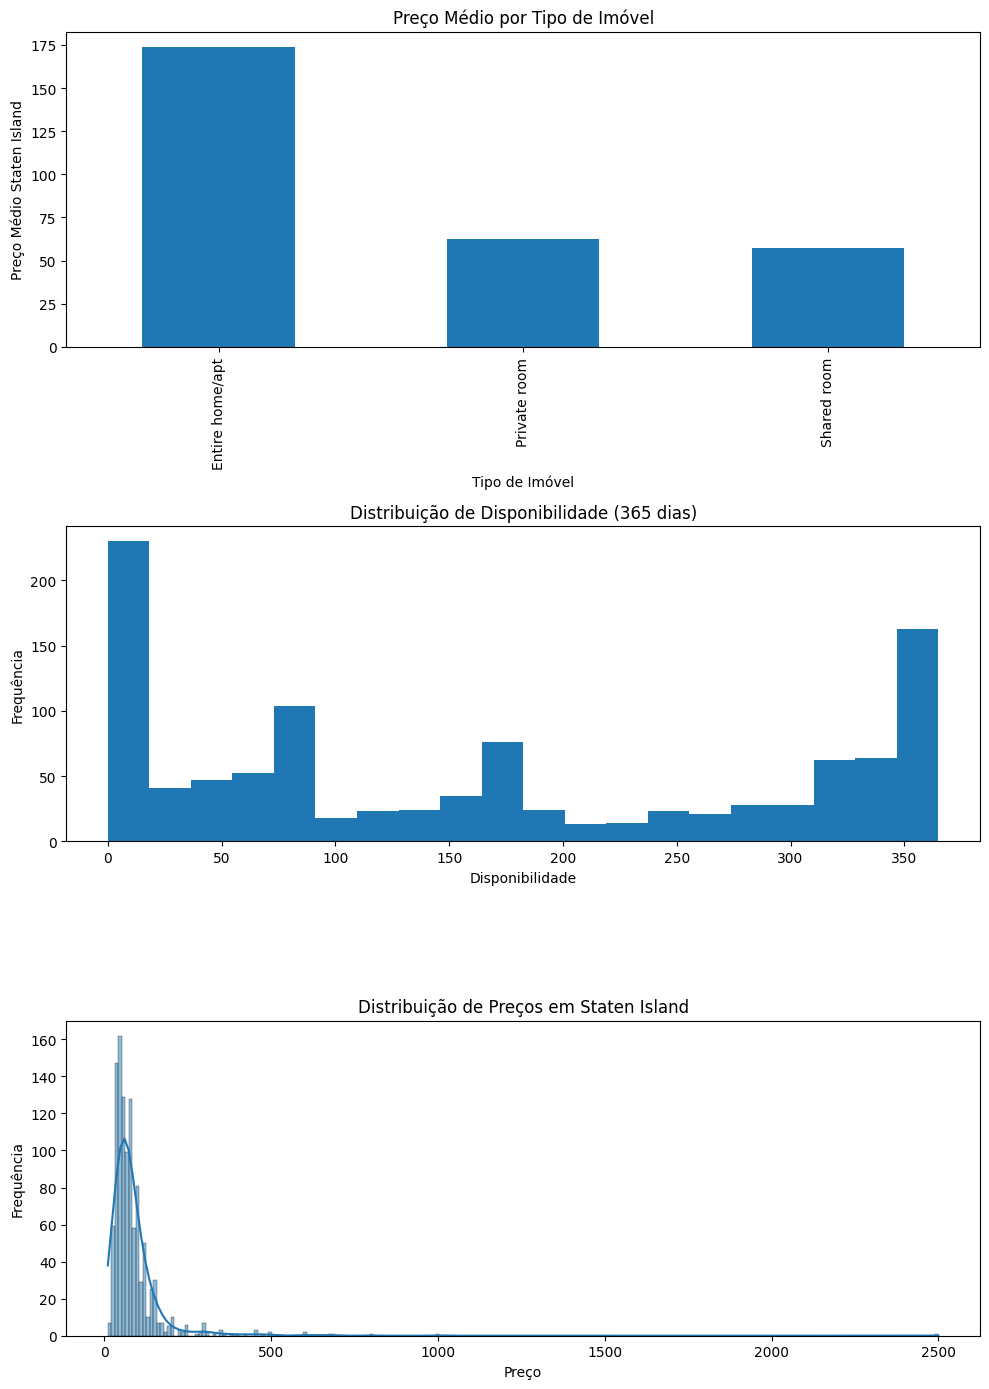

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

staten_island.groupby('room_type')['price'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title("Preço Médio por Tipo de Imóvel")
axes[0].set_xlabel("Tipo de Imóvel")
axes[0].set_ylabel("Preço Médio Staten Island")

bronx['availability_365'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_title("Distribuição de Disponibilidade (365 dias)")
axes[1].set_xlabel("Disponibilidade")
axes[1].set_ylabel("Frequência")

sns.histplot(data=bronx, x='price', kde=True)
axes[2].set_title('Distribuição de Preços em Staten Island')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

In [40]:
mean_price = staten_island.groupby('neighborhood')['price'].mean()
mean_price.columns = ['neighborhood', 'mean']
more_expensive_10 = mean_price.nlargest(10)
less_expensive_10 = mean_price.nsmallest(10)
expensive_values = staten_island[staten_island['neighborhood'].isin(more_expensive_10.index)]
cheap_values = staten_island[staten_island['neighborhood'].isin(less_expensive_10.index)]

/tmp/ipykernel_11968/3095825154.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_11968/3095825154.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)


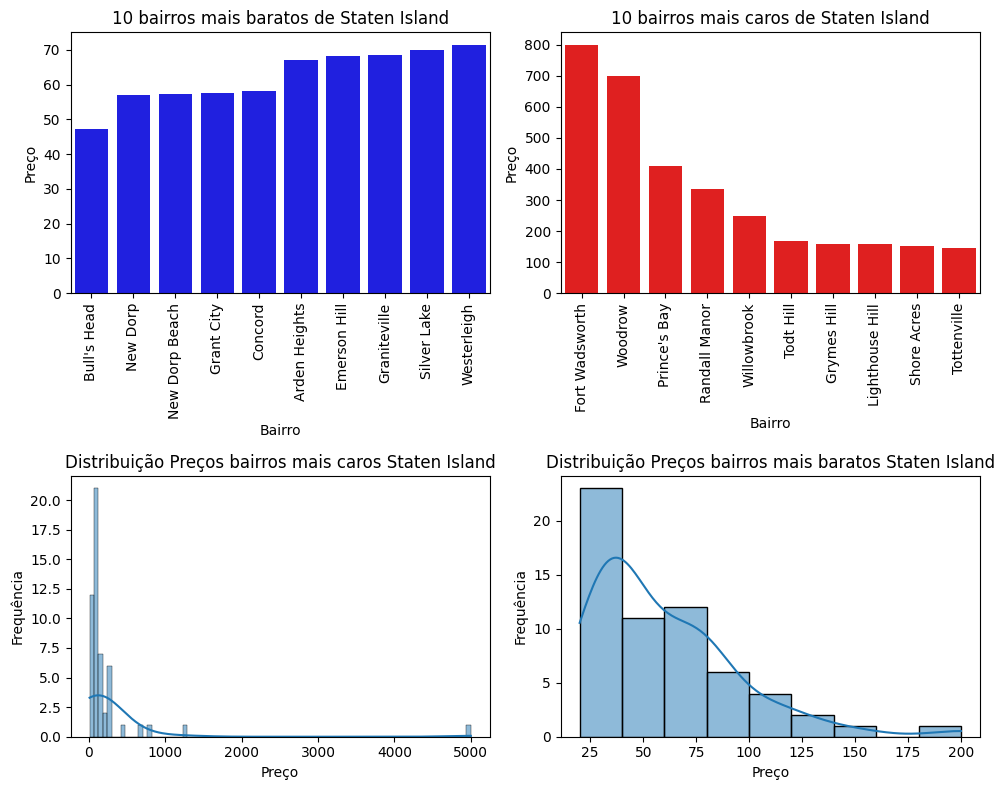

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(data=less_expensive_10, orient='v', ax=axes[0, 0], color='blue')
axes[0, 0].set_title("10 bairros mais baratos de Staten Island")
axes[0, 0].set_xlabel("Bairro")
axes[0, 0].set_ylabel("Preço")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

sns.barplot(data=more_expensive_10, orient='v', ax=axes[0, 1], color='red')
axes[0, 1].set_title("10 bairros mais caros de Staten Island")
axes[0, 1].set_xlabel("Bairro")
axes[0, 1].set_ylabel("Preço")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

sns.histplot(data=expensive_values, x='price', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição Preços bairros mais caros Staten Island')
axes[1, 0].set_xlabel('Preço')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(data=cheap_values, x='price', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição Preços bairros mais baratos Staten Island')
axes[1, 1].set_xlabel('Preço')
axes[1, 1].set_ylabel('Frequência')


plt.tight_layout()
plt.show()

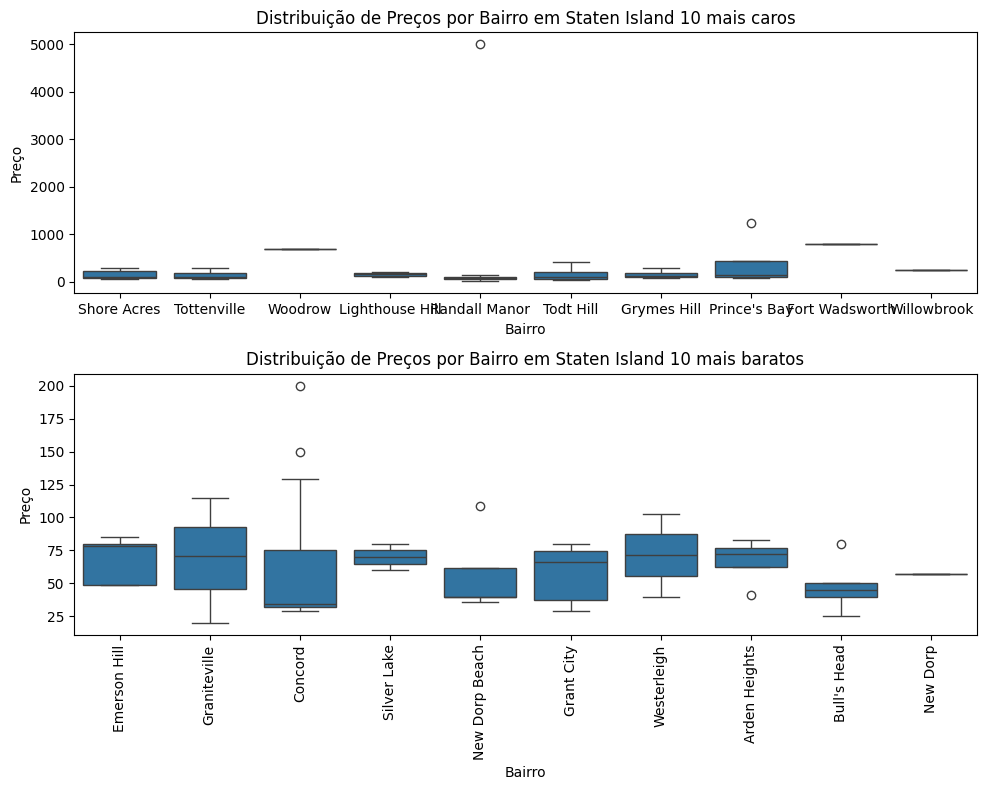

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(x='neighborhood', y='price', data=expensive_values, ax=axes[0])
axes[0].set_title('Distribuição de Preços por Bairro em Staten Island 10 mais caros')
axes[0].set_xlabel('Bairro')
axes[0].set_ylabel('Preço')
plt.xticks(rotation=90)

sns.boxplot(x='neighborhood', y='price', data=cheap_values, ax=axes[1])
axes[1].set_title('Distribuição de Preços por Bairro em Staten Island 10 mais baratos')
axes[1].set_xlabel('Bairro')
axes[1].set_ylabel('Preço')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()